<a href="https://colab.research.google.com/github/CodeWithMayank-Py/ML-Models/blob/main/CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
(Xtrain,ytrain),(Xtest,ytest) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
type(Xtrain)

numpy.ndarray

In [ ]:
type(ytrain)

numpy.ndarray

In [ ]:
type(Xtest)

numpy.ndarray

In [ ]:
type(ytest)

numpy.ndarray

In [ ]:
Xtrain.shape

(50000, 32, 32, 3)

In [ ]:
Xtrain.max(),Xtrain.min()

(255, 0)

In [ ]:
ytrain.shape

(50000, 1)

In [ ]:
Xtest.shape

(10000, 32, 32, 3)

In [ ]:
ytest.shape

(10000, 1)

In [ ]:
Xtrain[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
ytrain[0]

array([6], dtype=uint8)

In [ ]:
print(' type of Xtrain:',Xtrain.dtype)
print('type of ytrain:',ytrain.dtype)
print(' type of Xtest:',Xtest.dtype)
print(' type of ytest:',ytest.dtype)

 type of Xtrain: uint8
type of ytrain: uint8
 type of Xtest: uint8
 type of ytest: uint8


In [ ]:
print('Data type in Xtrain:',Xtrain.dtype)
print('Data type in ytrain:',Xtrain.dtype)
print('Data type in Xtest:',Xtrain.dtype)
print('Data type in ytest:',Xtrain.dtype)

Data type in Xtrain: uint8
Data type in ytrain: uint8
Data type in Xtest: uint8
Data type in ytest: uint8


In [ ]:
print(f'Data range in Xtrain:,({Xtrain.max(), Xtrain.min()})')
print(f'Data range in ytrain:,({ytrain.max(), ytrain.min()})')
print(f'Data range in Xtest:,({Xtest.max(), Xtest.min()})')
print(f'Data range in ytest:,({ytest.max(), ytest.min()})')


Data range in Xtrain:,((255, 0))
Data range in ytrain:,((9, 0))
Data range in Xtest:,((255, 0))
Data range in ytest:,((9, 0))


In [ ]:
print('Unique value in ytrain:',set(ytrain.flatten()))
print('Unique value in ytest:',set(ytest.flatten()))


Unique value in ytrain: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Unique value in ytest: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
print(f'Data range in Xtrain (before):,({Xtrain.max(), Xtrain.min()})')
print(f'Data range in Xtest(before):,({Xtest.max(), Xtest.min()})')

Xtrain=((Xtrain-Xtrain.min())/(Xtrain.max()-Xtrain.min())).astype('float32')
Xtest=((Xtest-Xtest.min())/(Xtest.max()-Xtest.min())).astype('float32')

print(f'Data range in Xtrain (after):,({Xtrain.max(), Xtrain.min()})')
print(f'Data range in Xtest(after):,({Xtest.max(), Xtest.min()})')


Data range in Xtrain (before):,((255, 0))
Data range in Xtest(before):,((255, 0))
Data range in Xtrain (after):,((1.0, 0.0))
Data range in Xtest(after):,((1.0, 0.0))


In [ ]:
#reshAPE y to 1D

ytrain=ytrain.flatten()
ytest=ytest.flatten()
#see final shape
print('Data shape in ytrain (after reshapping):',ytrain.shape)
print('Data shape in ytest (after reshapping):',ytest.shape)

Data shape in ytrain (after reshapping): (50000,)
Data shape in ytest (after reshapping): (10000,)


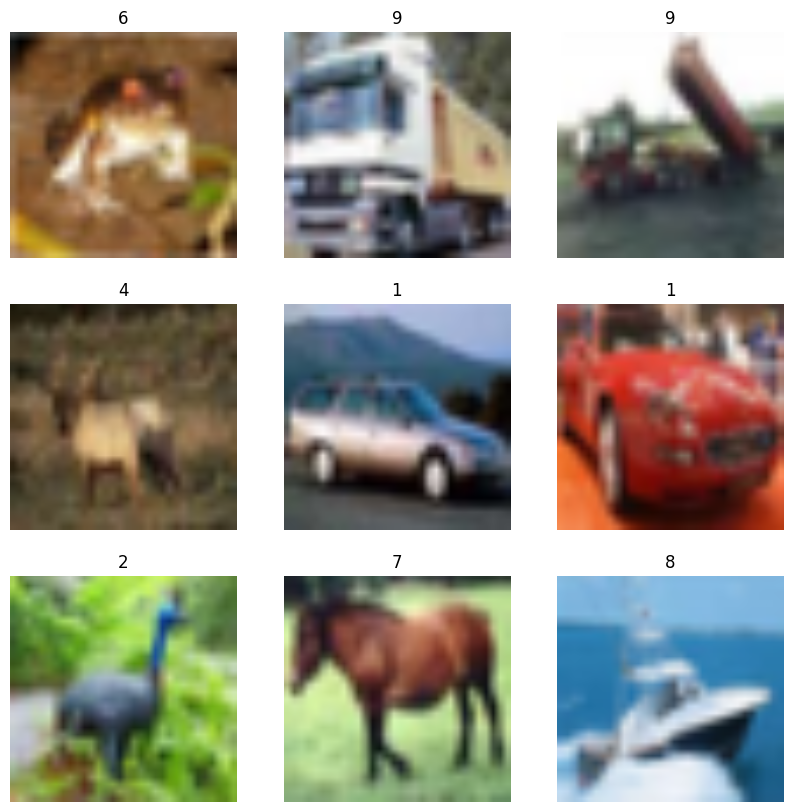

In [ ]:
plt.figure(figsize=(10,10))
for index in range(9):
  plt.subplot(3,3,index+1)
  plt.imshow(Xtrain[index],interpolation='bilinear')  #enhancing & the clarity of  picture
  plt.title(str(ytrain[index]))
  plt.axis("off")


# **model making**

In [ ]:
model=tf.keras.models.Sequential(layers=None,name='mnist_clf')
model.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu',
                                 input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPool2D())   #pool size 2,2 nd stride=2,2 by deafult
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',))     #number of depth is equal to filter numbers
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))      #1/4 of flatten output
model.add(tf.keras.layers.Dense(len(set(ytrain))))



In [ ]:
model.summary()      #NHWC

Model: "mnist_clf"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0 

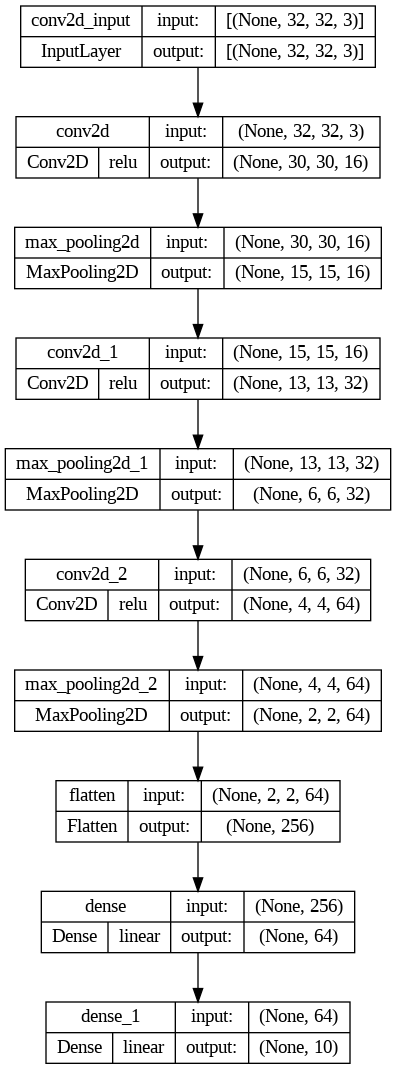

In [ ]:
tf.keras.utils.plot_model(model, to_file = "model.png",
  show_shapes= True, show_dtype= False,
      show_layer_names= True,expand_nested= False,
      dpi = 96,show_layer_activations= True,
        show_trainable = False)
